In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/position/Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.drop(columns=['Position', 'Salary'])
y = df['Salary']

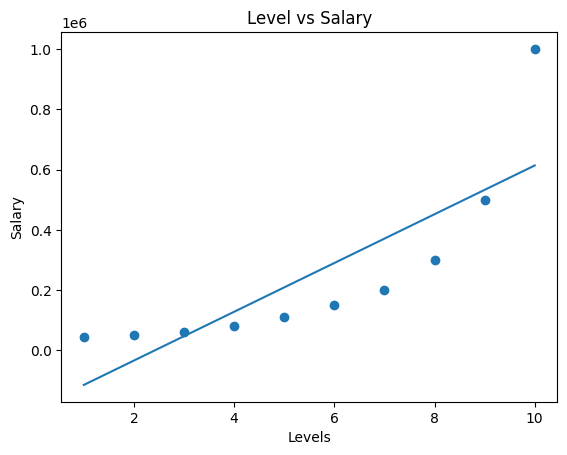

In [13]:
# Lets apply the simple Linear Regressor
# For understanding purpose lets do fitting on whole thing
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X, y) 
plt.plot(X, lg.predict(X))
plt.scatter(X, y)
plt.xlabel('Levels')
plt.ylabel('Salary') 
plt.title('Level vs Salary')
plt.show()

In [30]:
# We can see we are predicting the things properly
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias = False)
X_trans = poly.fit_transform(X)

In [31]:
X_trans

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [24]:
lg_updated = LinearRegression()
lg_updated.fit(X_trans, y)

LinearRegression()

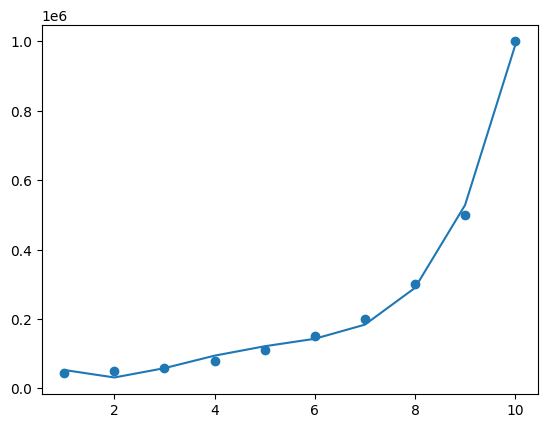

In [25]:
# Lets look on the whole data
y_pred = lg_updated.predict(X_trans)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

In [32]:
# Okay now on lets work actually
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train_trans, y_train)
y_pred = lg.predict(X_test_trans)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("MSE ", mean_squared_error(y_test, y_pred))
print("r2_score ", r2_score(y_test, y_pred)) 

MSE  1444499305.5473084
r2_score  0.9714666803842507
